# R notebook for MSDS Project

Analysis R notebook for the Microsoft Data Science final project. Although I got a bad grade on the report (mainly for not doing a more thorough ML Model analysis and comparison because I had a pc failure, and also just used my favorite model and stuck with it), I'm really content with my experience in all the courses. I learned a lot, and I will show it with personal projects.

I love jupyter notebooks, and since I use kaggle a lot, I really wished we could have submitted the report straight from a notebook. It's really sad that you can't though.

<h3>Initial data exploration</h3>

Let's begin by loading the datasets and checking their structure.

In [3]:
library("AzureML")
library('ggplot2') # visualization
install.packages('ggthemes')
library('ggthemes') # visualization
library('scales') # visualization
library('dplyr') # data manipulation


ws <- workspace(
  id = "fa5d809a5a41418d863ab001fc29772d",
  auth = "dFw0y4raGM2o7IQVRVcEyqhbPyefiAuC2Wfk2AcI8xATeiNt744lxUcdgtOBQ4rWpAqnCSgUP+sa5sT7DUI0LQ==",
  api_endpoint = "https://studioapi.azureml.net"
)
customers <- download.datasets(
  dataset = ws,
  name = "AWCustomers.csv"
)

sales <- download.datasets(
  dataset = ws,
  name = "AWSales.csv"
)
ClassifTest <- download.datasets(
  dataset = ws,
  name = "AWTest-Classification.csv"
)


RegTest <- download.datasets(
  dataset = ws,
  name = "AWTest-Regression.csv"
)


Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)



The downloaded source packages are in
	'/tmp/Rtmpf4Ac9y/downloaded_packages'



Attaching package: 'dplyr'

The following object is masked from 'package:stats':

    filter

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [4]:
str(customers)
str(sales)

'data.frame':	18361 obs. of  24 variables:
 $ X.U.FEFF.CustomerID : int  21173 13249 29350 13503 22803 22092 11229 24179 12127 19903 ...
 $ Title               : chr  "NULL" "NULL" "NULL" "NULL" ...
 $ FirstName           : chr  "Chad" "Ryan" "Julia" "Theodore" ...
 $ MiddleName          : chr  "C" "NULL" "NULL" "NULL" ...
 $ LastName            : chr  "Yuan" "Perry" "Thompson" "Gomez" ...
 $ Suffix              : chr  "NULL" "NULL" "NULL" "NULL" ...
 $ AddressLine1        : chr  "7090 C. Mount Hood" "3651 Willow Lake Rd" "1774 Tice Valley Blvd." "2103 Baldwin Dr" ...
 $ AddressLine2        : chr  "NULL" "NULL" "NULL" "NULL" ...
 $ City                : chr  "Wollongong" "Shawnee" "West Covina" "Liverpool" ...
 $ StateProvinceName   : chr  "New South Wales" "British Columbia" "California" "England" ...
 $ CountryRegionName   : chr  "Australia" "Canada" "United States" "United Kingdom" ...
 $ PostalCode          : chr  "2500" "V9B 2C3" "91791" "L4 4HB" ...
 $ PhoneNumber         : chr  

Since Bike buyer and AvgMonthSpend are our variables of interest, let's explore more about them by doing some plots! Let's start by plotting a histogram to compare how many people actually buy bikes.

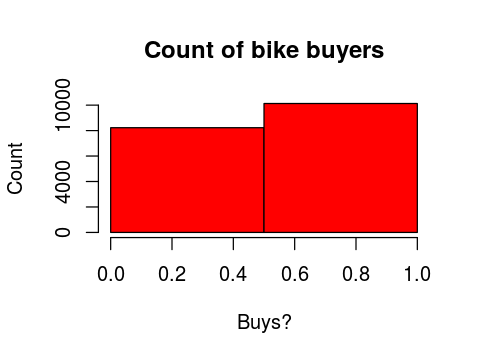

In [5]:
hist(sales$BikeBuyer,main = "Count of bike buyers", xlab = "Buys?", ylab = "Count",breaks = 2,border="black",col="red")

Looks like there's not much difference between those that buy and those that don't. But it's evident that there's more bike buyers that non-bike buyers.  Now onto the second variable, AvgMonthSpend. Let's start by visualizing the summary statistics.

In [6]:
summary(sales$AvgMonthSpend)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  44.10   49.41   51.42   51.77   53.60   65.29 

The difference between the minimum value and the maximum value is actually small, so the range of values isn't that big. Now let's visualize the distribution of the average spent by month per customer.

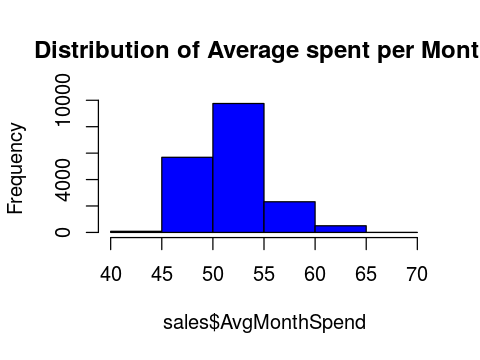

In [7]:
hist(sales$AvgMonthSpend,main="Distribution of Average spent per Month",breaks = 5,col = "blue")

Looks like the average money spent is close to the mean, which indicates a normal distribution.
Now let's take a look at the first 5 rows of the dataset, to get a glimpse of all the variables.

In [8]:
head(customers)

X.U.FEFF.CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated
21173,NULL,Chad,C,Yuan,NULL,7090 C. Mount Hood,NULL,Wollongong,New South Wales,...,Bachelors,Clerical,M,M,1,3,0,1,81916,2017-03-06
13249,NULL,Ryan,NULL,Perry,NULL,3651 Willow Lake Rd,NULL,Shawnee,British Columbia,...,Partial College,Clerical,M,M,1,2,1,2,81076,2017-03-06
29350,NULL,Julia,NULL,Thompson,NULL,1774 Tice Valley Blvd.,NULL,West Covina,California,...,Bachelors,Clerical,F,S,0,3,0,0,86387,2017-03-06
13503,NULL,Theodore,NULL,Gomez,NULL,2103 Baldwin Dr,NULL,Liverpool,England,...,Partial College,Skilled Manual,M,M,1,2,1,2,61481,2017-03-06
22803,NULL,Marshall,J,Shan,NULL,Am Gallberg 234,NULL,Werne,Nordrhein-Westfalen,...,Partial College,Skilled Manual,M,S,1,1,0,0,51804,2017-03-06
22092,NULL,Andrea,NULL,Young,NULL,9384 Ashmount Way,NULL,Tacoma,Washington,...,High School,Skilled Manual,F,M,1,2,2,2,61944,2017-03-06


Lot's of NULL values, but this is basically information of the customers.  Let's take a look at the summary of the dataset. 

In [9]:
summary(customers)

 X.U.FEFF.CustomerID    Title            FirstName          MiddleName       
 Min.   :11000       Length:18361       Length:18361       Length:18361      
 1st Qu.:15621       Class :character   Class :character   Class :character  
 Median :20248       Mode  :character   Mode  :character   Mode  :character  
 Mean   :20242                                                               
 3rd Qu.:24863                                                               
 Max.   :29483                                                               
   LastName            Suffix          AddressLine1       AddressLine2      
 Length:18361       Length:18361       Length:18361       Length:18361      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                     

Well that gives us a better idea of what each feature of the dataset entails. Now let's move on to the next phase...

<h3> Data Wrangling </h3>

First off, let's remove all the columns that probably won't help at all in the building of the model and for the data analysis.

In [10]:
customers$CustomerID <- customers$X.U.FEFF.CustomerID
customers <- customers[!(names(customers) %in% c("X.U.FEFF.CustomerID","FirstName","MiddleName","LastName","Suffix","AddressLine1","AddressLine2","City","StateProvinceName","PostalCode","PhoneNumber"))]

Now that we have trimmed the dataset from unwanted columns, let's verify that both datasets are the same size. 

In [11]:
dim(customers)
dim(sales)

[1] 18361    14

[1] 18355     3

In [12]:
head(customers)

Title,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated,CustomerID
NULL,Australia,1987-11-13,Bachelors,Clerical,M,M,1,3,0,1,81916,2017-03-06,21173
NULL,Canada,1972-07-21,Partial College,Clerical,M,M,1,2,1,2,81076,2017-03-06,13249
NULL,United States,1985-11-09,Bachelors,Clerical,F,S,0,3,0,0,86387,2017-03-06,29350
NULL,United Kingdom,1977-10-18,Partial College,Skilled Manual,M,M,1,2,1,2,61481,2017-03-06,13503
NULL,Germany,1975-02-05,Partial College,Skilled Manual,M,S,1,1,0,0,51804,2017-03-06,22803
NULL,United States,1975-02-23,High School,Skilled Manual,F,M,1,2,2,2,61944,2017-03-06,22092


Looks like there are more rows in customers than those in the sales dataset. That's probably an indication of duplicate values, so let's dig into them and remove them.

In [13]:
duplCID <- customers$CustomerID[duplicated(customers$CustomerID)]
customers<- customers[!(customers$CustomerID %in% duplCID &
                                                          customers$LastUpdated == '2017-03-06') ,]
dim(customers)

[1] 18355    14

Nice! Now both datasets have the same dimensions, and no data has been lost. Now let's merge them into one dataset, so it's easier to work with.

In [14]:
full <- merge(customers,sales,by="CustomerID")
dim(full)

[1] 18355    16

In [15]:
str(full)

'data.frame':	18355 obs. of  16 variables:
 $ CustomerID          : int  11000 11001 11002 11003 11004 11005 11006 11007 11008 11009 ...
 $ Title               : chr  "NULL" "NULL" "NULL" "NULL" ...
 $ CountryRegionName   : chr  "Australia" "Australia" "Australia" "Australia" ...
 $ BirthDate           : chr  "1986-04-08" "1985-05-14" "1985-08-12" "1988-02-15" ...
 $ Education           : chr  "Bachelors" "Bachelors" "Bachelors" "Bachelors" ...
 $ Occupation          : chr  "Skilled Manual" "Skilled Manual" "Clerical" "Management" ...
 $ Gender              : chr  "M" "M" "M" "F" ...
 $ MaritalStatus       : chr  "M" "S" "M" "S" ...
 $ HomeOwnerFlag       : int  1 0 1 0 0 1 1 1 1 0 ...
 $ NumberCarsOwned     : int  1 1 2 2 1 1 2 2 2 2 ...
 $ NumberChildrenAtHome: int  1 0 1 0 0 0 0 0 0 0 ...
 $ TotalChildren       : int  1 0 2 0 0 0 0 0 0 0 ...
 $ YearlyIncome        : int  62501 60339 85757 112042 110267 112804 110590 105642 108543 52091 ...
 $ LastUpdated         : chr  "2017-03-06" 

Now before continuing with more cleaning the missing values, let's  create some new features using feature engineering! The first one will be the Age of the customers, by calculating the difference between the last updated date, and the birth date.

In [16]:

full$BirthDate <- as.Date(full$BirthDate)
full$LastUpdated <- as.Date(full$LastUpdated)
diffyears <- as.numeric(round((full$LastUpdated - full$BirthDate)/365))
full$Age <- diffyears

Great, now we have the ages of all the customers. With this we can remove the other date columns.

In [17]:
full <- full[!(names(full) %in% c("BirthDate","LastUpdated"))]
dim(full)

[1] 18355    15

We are getting closer to the optimal dataset that we need for the problem. Now title is a weird variable, but we will leave it in to see how it affects the performance of the model. But first we need to fill in all missing values, which may sound tough, but it's really easy.

In [18]:
unique(full$Title)

[1] "NULL" "Mr."  "Ms."  "Mrs." "Sr."  "Ms"

In [19]:

full$Title[full$Title %in% c("Ms","Ms.")] <- "Miss"
full$Title[full$Age >= 18 & full$Gender == "F" & full$MaritalStatus == "S"] <- "Miss"
full$Title[full$Age >= 18 & full$Gender == "F" & full$MaritalStatus == "M"] <- "Mrs."
full$Title[full$Title == "Sr." ] <- "Mr."
full$Title[full$Age >= 18 & full$Gender == "M" ] <- "Mr."
full$Title[full$Title == "NULL"] <- "No Title"
str(full)

'data.frame':	18355 obs. of  15 variables:
 $ CustomerID          : int  11000 11001 11002 11003 11004 11005 11006 11007 11008 11009 ...
 $ Title               : chr  "Mr." "Mr." "Mr." "Miss" ...
 $ CountryRegionName   : chr  "Australia" "Australia" "Australia" "Australia" ...
 $ Education           : chr  "Bachelors" "Bachelors" "Bachelors" "Bachelors" ...
 $ Occupation          : chr  "Skilled Manual" "Skilled Manual" "Clerical" "Management" ...
 $ Gender              : chr  "M" "M" "M" "F" ...
 $ MaritalStatus       : chr  "M" "S" "M" "S" ...
 $ HomeOwnerFlag       : int  1 0 1 0 0 1 1 1 1 0 ...
 $ NumberCarsOwned     : int  1 1 2 2 1 1 2 2 2 2 ...
 $ NumberChildrenAtHome: int  1 0 1 0 0 0 0 0 0 0 ...
 $ TotalChildren       : int  1 0 2 0 0 0 0 0 0 0 ...
 $ YearlyIncome        : int  62501 60339 85757 112042 110267 112804 110590 105642 108543 52091 ...
 $ BikeBuyer           : int  1 0 1 1 0 0 0 1 1 1 ...
 $ AvgMonthSpend       : num  58.9 55.7 52 55.6 52.2 ...
 $ Age               

In [20]:
full$Title <- as.factor(full$Title)
full$CountryRegionName <- as.factor(full$CountryRegionName)
full$Education <- as.factor(full$Education)
full$Occupation<- as.factor(full$Occupation)
full$Gender <- as.factor(full$Gender)
full$MaritalStatus <- as.factor(full$MaritalStatus)

In [21]:
summary(full)

   CustomerID         Title           CountryRegionName
 Min.   :11000   Miss    :4250   Australia     :3568   
 1st Qu.:15620   Mr.     :9104   Canada        :1556   
 Median :20246   Mrs.    :4656   France        :1795   
 Mean   :20241   No Title: 345   Germany       :1767   
 3rd Qu.:24864                   United Kingdom:1903   
 Max.   :29483                   United States :7766   
               Education             Occupation   Gender   MaritalStatus
 Bachelors          :5321   Clerical      :4461   F:9070   M:9945       
 Graduate Degree    :3163   Management    :2858   M:9285   S:8410       
 High School        :3274   Manual        :3375                         
 Partial College    :5023   Professional  :1603                         
 Partial High School:1574   Skilled Manual:6058                         
                                                                        
 HomeOwnerFlag    NumberCarsOwned NumberChildrenAtHome TotalChildren   
 Min.   :0.0000   Min.   

Now, the data is cleaner and more consistent. We can visualize it now  and do more data manipulation later.

<h3> Data Visualization </h3>

Let's first start seeing the distribution of all of our features. We'll do this by plotting some histograms.

Don't know how to automatically pick scale for object of type function. Defaulting to continuous


Don't know how to automatically pick scale for object of type function. Defaulting to continuous


Don't know how to automatically pick scale for object of type function. Defaulting to continuous


Don't know how to automatically pick scale for object of type function. Defaulting to continuous


Don't know how to automatically pick scale for object of type function. Defaulting to continuous


Don't know how to automatically pick scale for object of type function. Defaulting to continuous


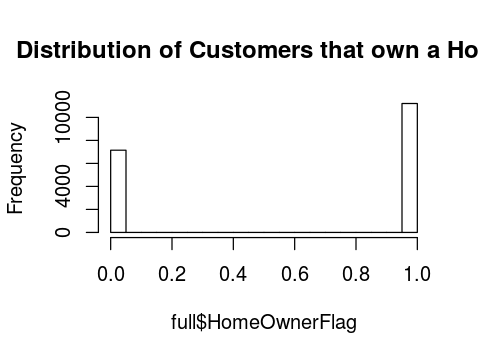

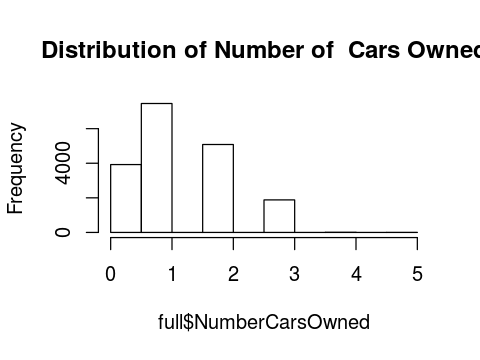

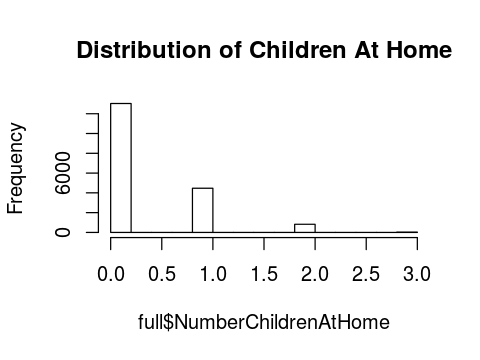

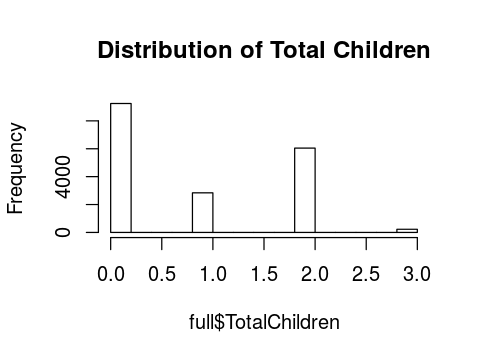

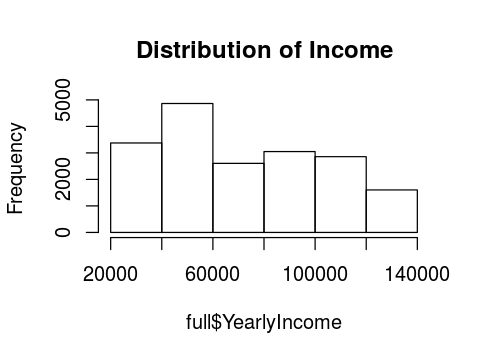

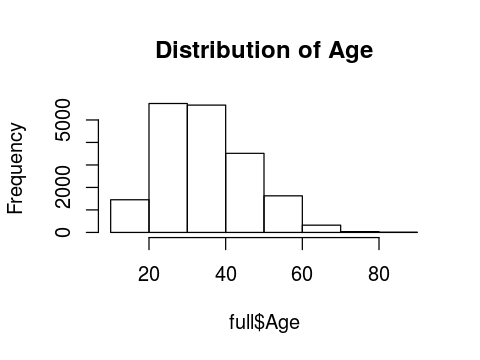

In [22]:
#Function that plots a histogram based on a variable
library(ggplot2)
factPlot <- function(df,var,main){
   plot <- ggplot(data = df, aes(x = var))
   plot <- plot + geom_bar(color = "blue", fill = "white") + ggtitle(main)
   plot
}


factPlot(full,full$Title,"Distribution of Titles")
factPlot(full,full$CountryRegionName,"Distribution of Regions")
factPlot(full,full$Education,"Distribution of Education")
factPlot(full,full$Occupation,"Distribution of Occupation")
factPlot(full,full$Gender,"Distribution of Gender")
factPlot(full,full$MaritalStatus,"Distribution of Marital Status")
hist(full$HomeOwnerFlag,main = "Distribution of Customers that own a Home")
hist(full$NumberCarsOwned,main = "Distribution of Number of  Cars Owned")
hist(full$NumberChildrenAtHome,main = "Distribution of Children At Home")
hist(full$TotalChildren,main = "Distribution of Total Children")
hist(full$YearlyIncome,main = "Distribution of Income",breaks = 8)
hist(full$Age,main = "Distribution of Age", breaks = 6)

For Titles, if we were to combine the Mrs. and Miss title , we would get almost the same amount of titles. Since most title
are just based on the Age, gender and marital status, we can remove this feature.

Australia and the United States have the most customers, while all other regions are distributed evenly.

Most customers' education is beyond Highschool. 

Most customers' occupation is either manual or clerical, which makes sense since professional or management workers 
mostly use cars.

The distribution of gender and marital status is mostly equal.

A lot of customers actually don't own a home, and some customers have up to 3 cars. We will probably change this feature 
to a flag of owning a car.



Most customers don't have children, or simply don't have them at home.


Income levels are actually distributed somewhat evenly, with most Income being less than 60k, this could be divided by bins. 

And most customers are on an age range from 25-40 years old. Age is another feature that could be divided by bins.

In [23]:
#Implement the changes mentioned.
full <- full[!(names(full) %in% c("Title"))]

full$IncomeBins[full$YearlyIncome >= 25000 & full$YearlyIncome <53000] <- "25k-53k"
full$IncomeBins[full$YearlyIncome >= 53000 & full$YearlyIncome <81000] <- "53k-81k"
full$IncomeBins[full$YearlyIncome >= 81000 & full$YearlyIncome <109000] <- "81k-109k"
full$IncomeBins[full$YearlyIncome >= 109000] <- "More than 109k"

full$OwnsCar[full$NumberCarsOwned >= 1] <- 1
full$OwnsCar[full$NumberCarsOwned == 0] <- 0

full$AgeBins[full$Age >= 16 & full$Age <28] <- "16-27"
full$AgeBins[full$Age >= 28 & full$Age <42] <- "28-41"
full$AgeBins[full$Age >= 42 & full$Age <56] <- "42-55"
full$AgeBins[full$Age >= 56 & full$Age <70] <- "56-69"
full$AgeBins[full$Age >= 70] <- "70+"



In [24]:
head(full)

CustomerID,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AvgMonthSpend,Age,IncomeBins,OwnsCar,AgeBins
11000,Australia,Bachelors,Skilled Manual,M,M,1,1,1,1,62501,1,58.91,31,53k-81k,1,28-41
11001,Australia,Bachelors,Skilled Manual,M,S,0,1,0,0,60339,0,55.72,32,53k-81k,1,28-41
11002,Australia,Bachelors,Clerical,M,M,1,2,1,2,85757,1,52.01,32,81k-109k,1,28-41
11003,Australia,Bachelors,Management,F,S,0,2,0,0,112042,1,55.60,29,More than 109k,1,28-41
11004,Australia,Bachelors,Management,F,S,0,1,0,0,110267,0,52.22,29,More than 109k,1,28-41
11005,Australia,Bachelors,Management,M,S,1,1,0,0,112804,0,56.97,32,More than 109k,1,28-41


Now we can start plotting some more plots to weigh these new features against the variables we are interested in : Bike buyers and Average per Month. Let's first compare Bike Buyers with our features.

In [25]:
#Barplots

plotBikeBuyer <- function(data,filler,main){
    plot <- ggplot(data,aes(x = BikeBuyer, fill= filler))+ geom_bar(position='dodge') + ggtitle(main)
    plot
}
plotBikeBuyer(full,full$CountryRegionName,"Bike Buyers by Region")
plotBikeBuyer(full,full$Education,"Bike Buyers by Education")
plotBikeBuyer(full,full$Occupation,"Bike Buyers by Occupation")
plotBikeBuyer(full,full$Gender,"Bike Buyers by Gender")
plotBikeBuyer(full,full$MaritalStatus,"Bike Buyers by Marital Status")
plotBikeBuyer(full,full$OwnsCar,"Bike Buyers by Car Owner")
plotBikeBuyer(full,full$IncomeBins,"Bike Buyers by Income")
plotBikeBuyer(full,full$AgeBins,"Bike Buyers by Age ")


In general,  there are more bike buyers than non bike buyers.

People of higher education are more likely to be bike buyers,  and surprisingly enough, there are way more 
clerical and management bike buying customers.

On the other hand, married customers are more likely to be bike buyers, and most people of low income are not bike buyers.
Maybe they should be lower priced.

Now let's compare our other variable of interest, Average Spent Monthly.

In [26]:
aggregate(full$AvgMonthSpend,by = list(feature= full$Occupation), FUN= sum)
sum(full$AvgMonthSpend)

feature,x
Clerical,235298.62
Management,153494.54
Manual,164026.10
Professional,87458.21
Skilled Manual,309909.61


[1] 950187.1

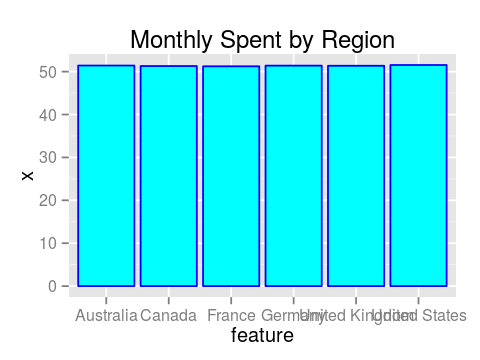

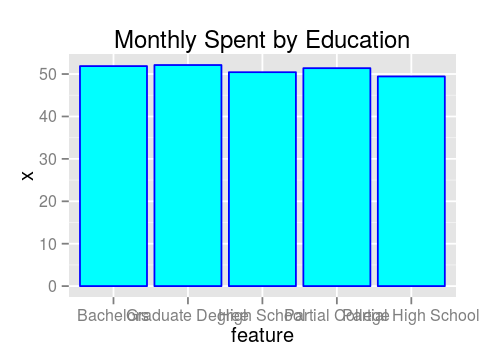

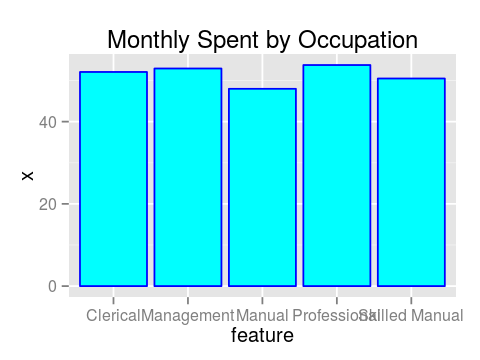

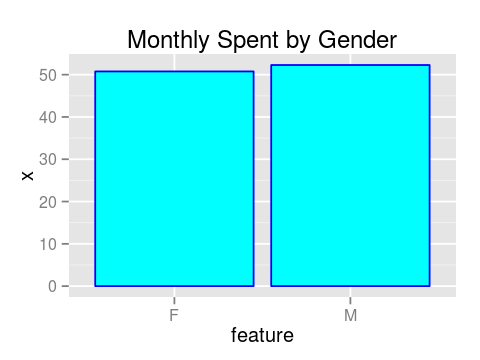

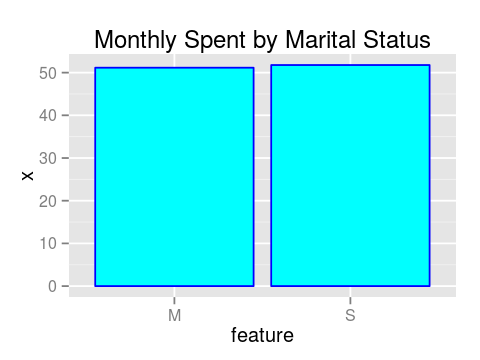

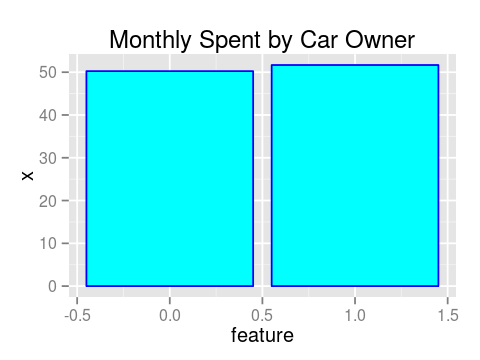

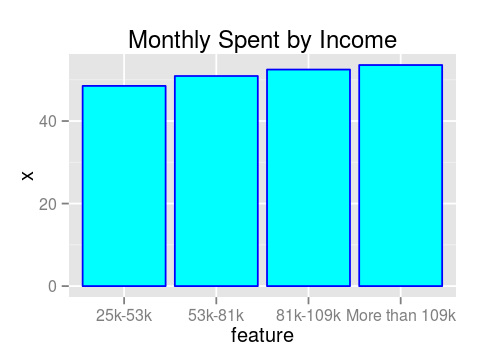

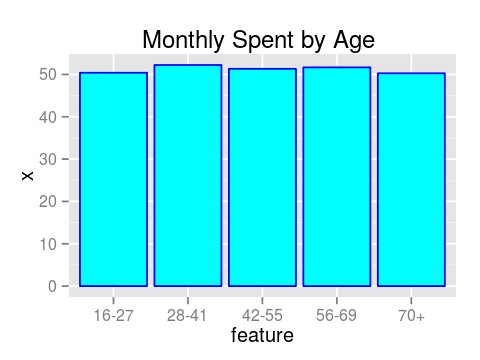

In [27]:
options(scipen=999)
plotMonthlySpent <- function(data,filler,main){
    group <- aggregate(full$AvgMonthSpend, by =list(feature=filler),FUN= median)
    plot <- ggplot(group,aes(x = feature, y= x))+ geom_bar(stat = 'identity',color="blue",fill="cyan") + ggtitle(main)
    plot
}

plotMonthlySpent(full,full$CountryRegionName,"Monthly Spent by Region")
plotMonthlySpent(full,full$Education,"Monthly Spent by Education")
plotMonthlySpent(full,full$Occupation,"Monthly Spent by Occupation")
plotMonthlySpent(full,full$Gender,"Monthly Spent by Gender")
plotMonthlySpent(full,full$MaritalStatus,"Monthly Spent by Marital Status")
plotMonthlySpent(full,full$OwnsCar,"Monthly Spent by Car Owner")
plotMonthlySpent(full,full$IncomeBins,"Monthly Spent by Income")
plotMonthlySpent(full,full$AgeBins,"Monthly Spent by Age ")

Not much out of the ordinary, based on what we already know. In general, those who buy bikes spend more, but that is fairly 
obvious.  Car owners spend almost 4 times as more than non car owners, and it seems our target demographic is adults aged
28-41 years old, who have a decent yearly income. Now let's look at the correlation between our features.

Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)



The downloaded source packages are in
	'/tmp/Rtmpf4Ac9y/downloaded_packages'
                       CustomerID HomeOwnerFlag NumberCarsOwned
CustomerID            1.000000000   -0.02919934     -0.01218219
HomeOwnerFlag        -0.029199341    1.00000000      0.20976601
NumberCarsOwned      -0.012182188    0.20976601      1.00000000
NumberChildrenAtHome -0.039761661    0.36849354      0.02047559
TotalChildren        -0.071346954    0.57819849      0.03016497
YearlyIncome         -0.029326644    0.35615120      0.47730133
BikeBuyer            -0.021567631    0.22910245      0.18541988
AvgMonthSpend         0.002832351    0.29076500      0.27549835
Age                  -0.013202878    0.64220620      0.04162926
OwnsCar              -0.005594873    0.14658357      0.72489094
                     NumberChildrenAtHome TotalChildren YearlyIncome
CustomerID                   -0.039761661   -0.07134695 -0.029326644
HomeOwnerFlag                 0.368493542    0.57819849  0.356151203
NumberCarsO

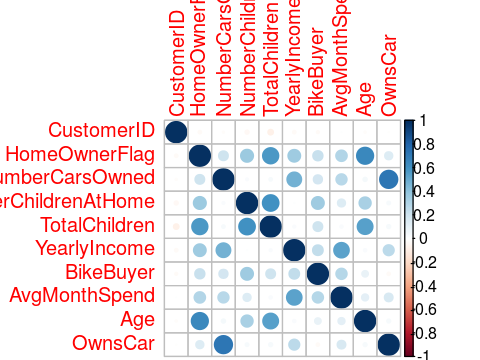

In [43]:
#install.packages('corrplot', repos='http://cran.us.r-project.org')
install.packages("corrplot")
library(corrplot)
nums <- sapply(full,is.numeric)
M <- cor(full[,nums])
print(M)
corrplot(M, method = "circle")

Nothing too out of place here, some obvious strong correlations include: Older people are more likely to own a house, a car and have children. On one particular note, income is correlated with Average spent by month, but that doesn't say a lot. For a final plot, let's plot some boxplots on yearly income and Average Month Spend  to see if we can spot any outliers.

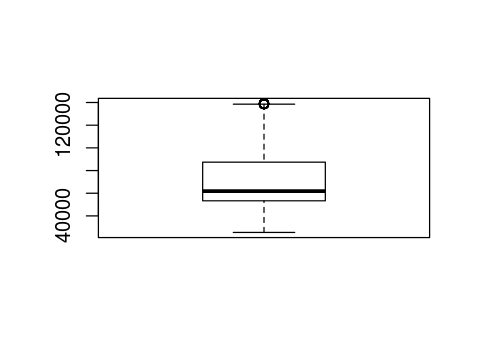

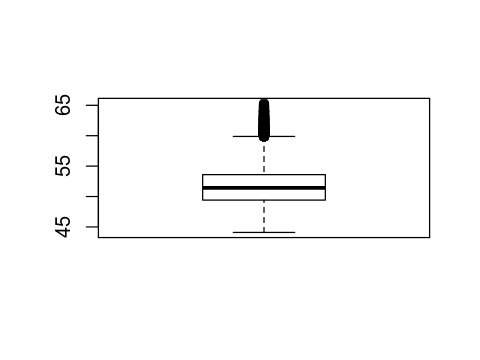

In [29]:
boxplot(full$YearlyIncome)
boxplot(full$AvgMonthSpend)

Nothing is wrong here actually. Let's now compare yearly income.

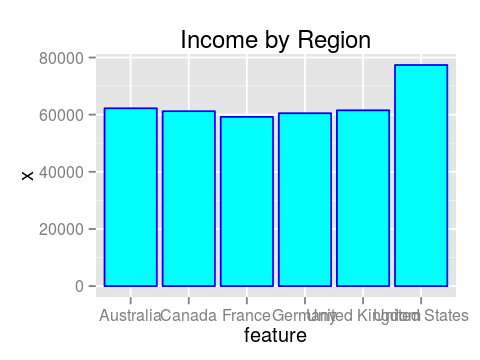

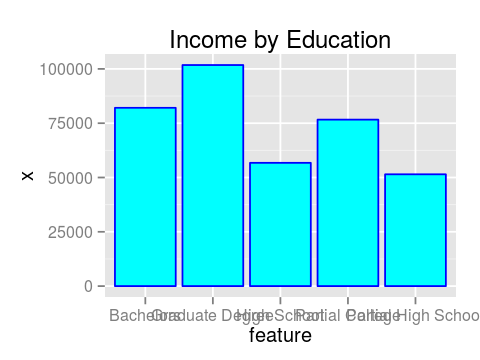

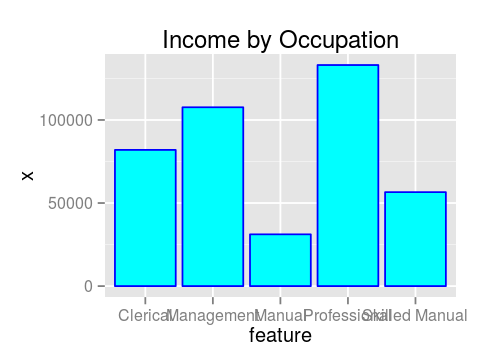

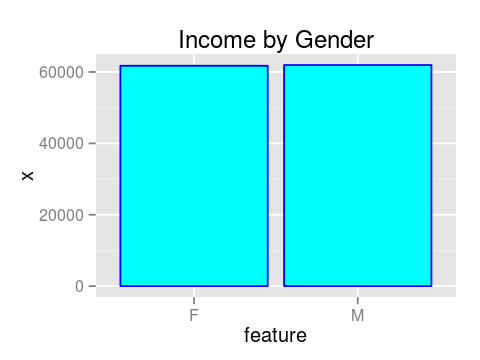

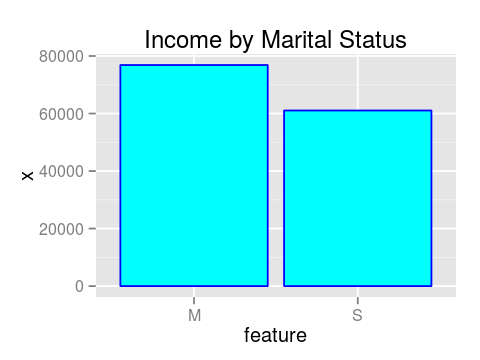

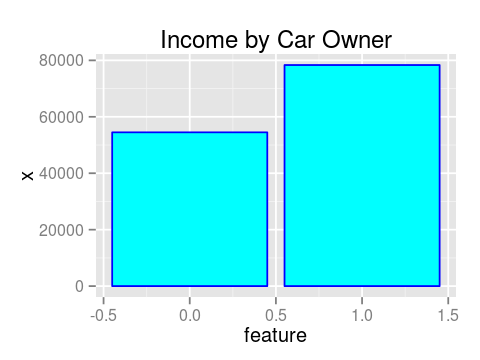

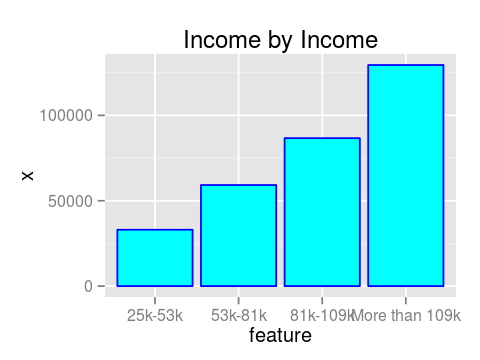

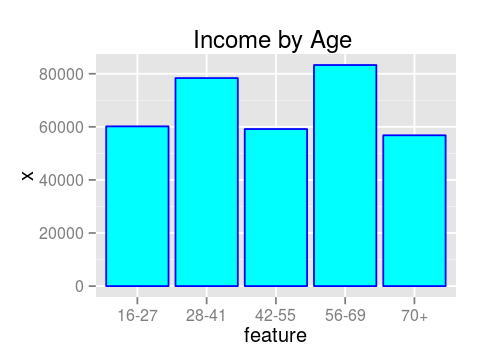

In [30]:
plotYearlyIncome <- function(data,filler,main){
    group <- aggregate(full$YearlyIncome, by =list(feature=filler),FUN= median)
    plot <- ggplot(group,aes(x = feature, y= x))+ geom_bar(stat = 'identity',color="blue",fill="cyan") + ggtitle(main)
    plot
}

plotYearlyIncome(full,full$CountryRegionName,"Income by Region")
plotYearlyIncome(full,full$Education,"Income by Education")
plotYearlyIncome(full,full$Occupation,"Income by Occupation")
plotYearlyIncome(full,full$Gender,"Income by Gender")
plotYearlyIncome(full,full$MaritalStatus,"Income by Marital Status")
plotYearlyIncome(full,full$OwnsCar,"Income by Car Owner")
plotYearlyIncome(full,full$IncomeBins,"Income by Income")
plotYearlyIncome(full,full$AgeBins,"Income by Age ")

And with that we are done plotting for now.

In [31]:
install.packages('randomForest')

Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)



The downloaded source packages are in
	'/tmp/Rtmpf4Ac9y/downloaded_packages'


In [32]:

full$AgeBins <- as.factor(full$AgeBins)
str(full)

#full$Age[full$Age >=16 && full$Age <28] <- 1
#full$Age[full$Age >=28 && full$Age <42] <- 2
#full$Age[full$Age >=42 && full$Age <55] <- 3
#full$Age[full$Age >=56 && full$Age <70] <- 4
#full$Age[full$Age >=70] <- 5

#full$YearlyIncome[full$YearlyIncome >= 25000 && full$YearlyIncome < 53000] <- 1
#full$YearlyIncome[full$YearlyIncome >= 53000 && full$YearlyIncome < 81000] <- 2
#full$YearlyIncome[full$YearlyIncome >= 81000 && full$YearlyIncome < 109000] <- 3
#full$YearlyIncome[full$YearlyIncome >= 109000 ] <- 4

full$CountryRegionName <- as.factor(full$CountryRegionName)
full$Education <- as.factor(full$Education)
full$Occupation <- as.factor(full$Occupation)
full$Gender <- as.factor(full$Gender)
full$MaritalStatus <- as.factor(full$MaritalStatus)



'data.frame':	18355 obs. of  17 variables:
 $ CustomerID          : int  11000 11001 11002 11003 11004 11005 11006 11007 11008 11009 ...
 $ CountryRegionName   : Factor w/ 6 levels "Australia","Canada",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Education           : Factor w/ 5 levels "Bachelors","Graduate Degree",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Occupation          : Factor w/ 5 levels "Clerical","Management",..: 5 5 1 2 2 2 2 2 2 5 ...
 $ Gender              : Factor w/ 2 levels "F","M": 2 2 2 1 1 2 1 2 1 2 ...
 $ MaritalStatus       : Factor w/ 2 levels "M","S": 1 2 1 2 2 2 2 1 2 2 ...
 $ HomeOwnerFlag       : int  1 0 1 0 0 1 1 1 1 0 ...
 $ NumberCarsOwned     : int  1 1 2 2 1 1 2 2 2 2 ...
 $ NumberChildrenAtHome: int  1 0 1 0 0 0 0 0 0 0 ...
 $ TotalChildren       : int  1 0 2 0 0 0 0 0 0 0 ...
 $ YearlyIncome        : int  62501 60339 85757 112042 110267 112804 110590 105642 108543 52091 ...
 $ BikeBuyer           : int  1 0 1 1 0 0 0 1 1 1 ...
 $ AvgMonthSpend       : num  58.9 55.7 52 55.6 

Now, let's convert our bins into numbers for the MLModel.

In [33]:
ClassifTest <- download.datasets(
  dataset = ws,
  name = "AWTest-Classification.csv"
)


RegTest <- download.datasets(
  dataset = ws,
  name = "AWTest-Regression.csv"
)

str(ClassifTest)

'data.frame':	50 obs. of  24 variables:
 $ CustomerID          : int  11219 11241 11352 11904 11908 12113 12221 12286 12292 12305 ...
 $ Title               : chr  "NULL" "NULL" "NULL" "NULL" ...
 $ FirstName           : chr  "Charles" "Lisa" "Raymond" "Kaylee" ...
 $ MiddleName          : chr  "NULL" "NULL" "A" "NULL" ...
 $ LastName            : chr  "Cook" "Cai" "Rodriguez" "Cook" ...
 $ Suffix              : chr  "NULL" "NULL" "NULL" "NULL" ...
 $ AddressLine1        : chr  "6871 Bel Air Dr." "102, rue de Berri" "24, impasse Ste-Madeleine" "5742 Curtis Drive" ...
 $ AddressLine2        : chr  "NULL" "NULL" "NULL" "NULL" ...
 $ City                : chr  "Woodburn" "Les Ulis" "Pantin" "Geelong" ...
 $ StateProvinceName   : chr  "Oregon" "Essonne" "Seine Saint Denis" "Victoria" ...
 $ CountryRegionName   : chr  "United States" "France" "France" "Australia" ...
 $ PostalCode          : chr  "97071" "91940" "93500" "3220" ...
 $ PhoneNumber         : chr  "755-555-0111" "1 (11) 500 555

In [34]:
ClassifTest$YearlyIncome <- scale(ClassifTest$YearlyIncome)
full$YearlyIncome <- scale(full$YearlyIncome)

In [35]:
ClassifTest$BirthDate <- as.Date(ClassifTest$BirthDate)
ClassifTest$LastUpdated <- as.Date(ClassifTest$LastUpdated)
class(ClassifTest$BirthDate)
str(ClassifTest)

[1] "Date"

'data.frame':	50 obs. of  24 variables:
 $ CustomerID          : int  11219 11241 11352 11904 11908 12113 12221 12286 12292 12305 ...
 $ Title               : chr  "NULL" "NULL" "NULL" "NULL" ...
 $ FirstName           : chr  "Charles" "Lisa" "Raymond" "Kaylee" ...
 $ MiddleName          : chr  "NULL" "NULL" "A" "NULL" ...
 $ LastName            : chr  "Cook" "Cai" "Rodriguez" "Cook" ...
 $ Suffix              : chr  "NULL" "NULL" "NULL" "NULL" ...
 $ AddressLine1        : chr  "6871 Bel Air Dr." "102, rue de Berri" "24, impasse Ste-Madeleine" "5742 Curtis Drive" ...
 $ AddressLine2        : chr  "NULL" "NULL" "NULL" "NULL" ...
 $ City                : chr  "Woodburn" "Les Ulis" "Pantin" "Geelong" ...
 $ StateProvinceName   : chr  "Oregon" "Essonne" "Seine Saint Denis" "Victoria" ...
 $ CountryRegionName   : chr  "United States" "France" "France" "Australia" ...
 $ PostalCode          : chr  "97071" "91940" "93500" "3220" ...
 $ PhoneNumber         : chr  "755-555-0111" "1 (11) 500 555

In [36]:
#Prepare Test data

diffyears <- as.numeric(round((ClassifTest$LastUpdated - ClassifTest$BirthDate)/365))
ClassifTest$Age <- diffyears

ClassifTest <- ClassifTest[!(names(ClassifTest) %in% c("BirthDate","LastUpdated"))]
ClassifTest <- ClassifTest[!(names(ClassifTest) %in% c("FirstName","MiddleName","LastName","Suffix","AddressLine1","AddressLine2","City","StateProvinceName","PostalCode","PhoneNumber","Title"))]

ClassifTest$OwnsCar[ClassifTest$NumberCarsOwned >= 1] <- 1
ClassifTest$OwnsCar[ClassifTest$NumberCarsOwned == 0] <- 0

#ClassifTest$Age[ClassifTest$Age >=16 && ClassifTest$Age <28] <- 1
#ClassifTest$Age[ClassifTest$Age >=28 && ClassifTest$Age <42] <- 2
#ClassifTest$Age[ClassifTest$Age >=42 && ClassifTest$Age <55] <- 3
#ClassifTest$Age[ClassifTest$Age >=56 && ClassifTest$Age <70] <- 4
#ClassifTest$Age[ClassifTest$Age >=70] <- 5

#ClassifTest$YearlyIncome[ClassifTest$YearlyIncome >= 25000 && ClassifTest$YearlyIncome < 53000] <- 1
#ClassifTest$YearlyIncome[ClassifTest$YearlyIncome >= 53000 && ClassifTest$YearlyIncome < 81000] <- 2
#ClassifTest$YearlyIncome[ClassifTest$YearlyIncome >= 81000 && ClassifTest$YearlyIncome < 109000] <- 3
#ClassifTest$YearlyIncome[ClassifTest$YearlyIncome >= 109000 ] <- 4

ClassifTest$CountryRegionName <- as.factor(ClassifTest$CountryRegionName)
ClassifTest$Education <- as.factor(ClassifTest$Education)
ClassifTest$Occupation <- as.factor(ClassifTest$Occupation)
ClassifTest$Gender <- as.factor(ClassifTest$Gender)
ClassifTest$MaritalStatus <- as.factor(ClassifTest$MaritalStatus)

str(ClassifTest)

'data.frame':	50 obs. of  13 variables:
 $ CustomerID          : int  11219 11241 11352 11904 11908 12113 12221 12286 12292 12305 ...
 $ CountryRegionName   : Factor w/ 6 levels "Australia","Canada",..: 6 3 3 1 1 2 3 5 5 5 ...
 $ Education           : Factor w/ 5 levels "Bachelors","Graduate Degree",..: 3 4 4 2 2 3 2 2 1 4 ...
 $ Occupation          : Factor w/ 5 levels "Clerical","Management",..: 5 5 1 4 4 1 1 4 5 1 ...
 $ Gender              : Factor w/ 2 levels "F","M": 2 1 2 1 2 2 1 2 2 2 ...
 $ MaritalStatus       : Factor w/ 2 levels "M","S": 1 2 1 2 2 1 1 2 1 1 ...
 $ HomeOwnerFlag       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ NumberCarsOwned     : int  2 0 3 2 2 3 2 2 1 0 ...
 $ NumberChildrenAtHome: int  2 0 0 0 0 1 0 0 0 1 ...
 $ TotalChildren       : int  2 0 2 0 0 2 2 0 2 2 ...
 $ YearlyIncome        : num [1:50, 1] -0.695 -0.523 0.176 1.662 1.831 ...
  ..- attr(*, "scaled:center")= num 78064
  ..- attr(*, "scaled:scale")= num 31589
 $ Age                 : num  46 39 57 27 31 46

And now the randomforest prediction

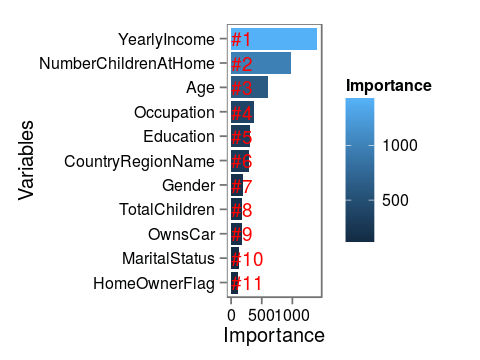

In [50]:
library('randomForest')

set.seed(10)

train <- full[1:15000,]
test <- full[15000:18355,]

test$BikeBuyer <- NA
test$AvgMonthSpend < NA

rf_model <- randomForest(factor(BikeBuyer) ~ CountryRegionName + Education + Occupation + Gender + MaritalStatus + 
                                            HomeOwnerFlag + OwnsCar + Age + 
                                            NumberChildrenAtHome + TotalChildren + YearlyIncome,
                                            data = train)

# Get importance
importance    <- importance(rf_model)
varImportance <- data.frame(Variables = row.names(importance), 
                            Importance = round(importance[ ,'MeanDecreaseGini'],2))

# Create a rank variable based on importance
rankImportance <- varImportance %>%
  mutate(Rank = paste0('#',dense_rank(desc(Importance))))

# Use ggplot2 to visualize the relative importance of variables
ggplot(rankImportance, aes(x = reorder(Variables, Importance), 
    y = Importance, fill = Importance)) +
  geom_bar(stat='identity') + 
  geom_text(aes(x = Variables, y = 0.5, label = Rank),
    hjust=0, vjust=0.55, size = 4, colour = 'red') +
  labs(x = 'Variables') +
  coord_flip() + 
  theme_few()

In [52]:
valpredict <- predict(rf_model,test)
validation <- data.frame(ID=test$CustomerID,Predicted = valpredict, real = full$BikeBuyer[15000:18355])
Accuracy <- sum(ifelse(validation$Predicted == validation$real,1,0))
Accuracy/nrow(validation)

[1] 0.7410608

In [46]:
summary(rf_model)

                Length Class  Mode     
call                3  -none- call     
type                1  -none- character
predicted       18355  factor numeric  
err.rate         1500  -none- numeric  
confusion           6  -none- numeric  
votes           36710  matrix numeric  
oob.times       18355  -none- numeric  
classes             2  -none- character
importance         11  -none- numeric  
importanceSD        0  -none- NULL     
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             14  -none- list     
y               18355  factor numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     

In [38]:
prediction <- predict(rf_model, ClassifTest)

result <- data.frame(CustomerID = ClassifTest$CustomerID, BikeBuyer = prediction)
result


CustomerID,BikeBuyer
11219,1
11241,0
11352,0
11904,0
11908,1
12113,1
12221,0
12286,1
12292,0
12305,1


In [39]:
RegTest$BirthDate <- as.Date(RegTest$BirthDate)
RegTest$LastUpdated <- as.Date(RegTest$LastUpdated)
class(RegTest$BirthDate)

diffyears <- as.numeric(round((RegTest$LastUpdated - RegTest$BirthDate)/365))
RegTest$Age <- diffyears

RegTest <- RegTest[!(names(RegTest) %in% c("BirthDate","LastUpdated"))]
RegTest <- RegTest[!(names(RegTest) %in% c("FirstName","MiddleName","LastName","Suffix","AddressLine1","AddressLine2","City","StateProvinceName","PostalCode","PhoneNumber","Title"))]

RegTest$OwnsCar[RegTest$NumberCarsOwned >= 1] <- 1
RegTest$OwnsCar[RegTest$NumberCarsOwned == 0] <- 0

RegTest$CountryRegionName <- as.factor(RegTest$CountryRegionName)
RegTest$Education <- as.factor(RegTest$Education)
RegTest$Occupation <- as.factor(RegTest$Occupation)
RegTest$Gender <- as.factor(RegTest$Gender)
RegTest$MaritalStatus <- as.factor(RegTest$MaritalStatus)



[1] "Date"

In [40]:
str(RegTest)

'data.frame':	25 obs. of  13 variables:
 $ CustomerID          : int  11908 12286 12892 14698 15085 15727 17418 17723 18644 19218 ...
 $ CountryRegionName   : Factor w/ 6 levels "Australia","Canada",..: 1 5 2 4 3 1 6 5 2 6 ...
 $ Education           : Factor w/ 4 levels "Bachelors","Graduate Degree",..: 2 2 2 1 2 1 1 1 2 4 ...
 $ Occupation          : Factor w/ 5 levels "Clerical","Management",..: 4 4 4 2 4 2 4 2 2 5 ...
 $ Gender              : Factor w/ 2 levels "F","M": 2 2 2 1 1 1 1 2 1 2 ...
 $ MaritalStatus       : Factor w/ 2 levels "M","S": 2 2 1 1 2 1 1 1 2 1 ...
 $ HomeOwnerFlag       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ NumberCarsOwned     : int  2 2 2 3 0 1 3 3 2 2 ...
 $ NumberChildrenAtHome: int  0 0 0 0 0 1 0 0 0 1 ...
 $ TotalChildren       : int  0 0 0 0 0 2 0 2 0 1 ...
 $ YearlyIncome        : int  135915 137732 135404 104040 129319 111985 136717 113395 106191 56412 ...
 $ Age                 : num  31 28 25 23 28 25 34 54 31 40 ...
 $ OwnsCar             : num  1 1 1 1 

In [41]:
rf_model2 <- randomForest(AvgMonthSpend ~ CountryRegionName  + Occupation + Gender + MaritalStatus + 
                                            HomeOwnerFlag + OwnsCar + Age + 
                                            NumberChildrenAtHome + TotalChildren + YearlyIncome,
                                            data = train)

In [58]:
predict_reg <- predict(rf_model2,test)
validatereg <- data.frame(CustomerId = test$CustomerID,predicted=predict_reg,real = full$AvgMonthSpend[15000:18355])

RMSE <- sqrt(sum(((validatereg$predicted - validatereg$real)**2)/nrow(validatereg)))

In [59]:
RMSE

[1] 1.65737

In [42]:
prediction_reg <- predict(rf_model2, RegTest)

result_reg <- data.frame(CustomerID = RegTest$CustomerID, AvgMonthSpend = prediction_reg)
result_reg

CustomerID,AvgMonthSpend
11908,58.28910
12286,54.33044
12892,52.61815
14698,52.04728
15085,54.51181
15727,53.85914
17418,52.84364
17723,52.57434
18644,54.09232
19218,56.74907
